<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


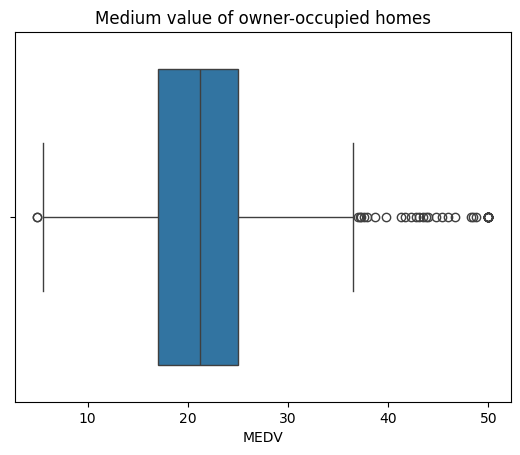

In [8]:
ax=sns.boxplot(data=boston_df,x='MEDV').set_title('Medium value of owner-occupied homes')

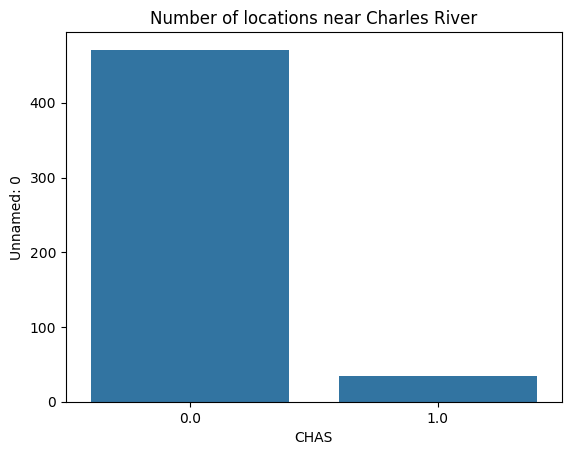

In [9]:
CR = boston_df.groupby('CHAS')['Unnamed: 0'].count().reset_index()
CR
ax = sns.barplot(data=CR,x='CHAS',y='Unnamed: 0').set_title('Number of locations near Charles River')

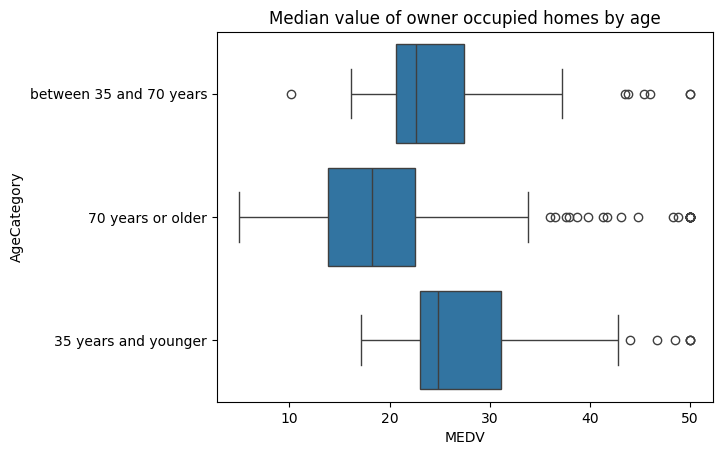

In [10]:
def SetAgeCat(row):

    if row['AGE'] < 35:
        return '35 years and younger'
    if row['AGE'] < 70:
        return 'between 35 and 70 years'
    else:
        return '70 years or older'

boston_df['AgeCategory'] = boston_df.apply(SetAgeCat,axis=1)

ax=sns.boxplot(data=boston_df,x='MEDV',y='AgeCategory').set_title('Median value of owner occupied homes by age')


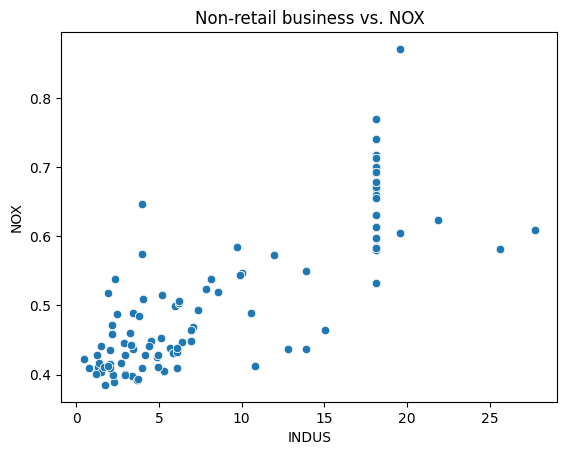

In [11]:
ax = sns.scatterplot(x='INDUS',y='NOX',data=boston_df).set_title('Non-retail business vs. NOX')

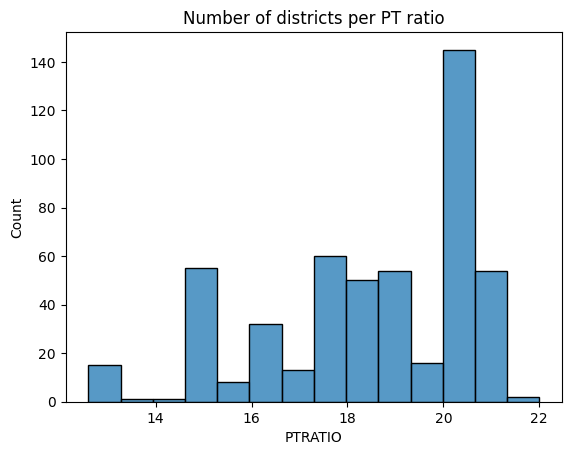

In [12]:
ax=sns.histplot(data=boston_df,x='PTRATIO').set_title('Number of districts per PT ratio')

In [13]:
# Hypothesis - There is significant different between MEDV of houses
# close to the Charles River compared to those further away
# The NULL hypothesis is that there is no link

scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],
                    boston_df[boston_df['CHAS']==1]['MEDV'],
                   center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                    boston_df[boston_df['CHAS']==1]['MEDV'],
                   equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [ ]:
#Conclusion
#As the p-Value of the T-Test (0.00357) is less than 0.05 then the null hypothesis is rejected 
#and the hypothese proven


In [15]:
#Hypothesis - There is a difference in the MEDV for houses built before 1940
# Null hypothesis is that there is no link

def Before1940(row):

    if (row['AGE'] < (2024-1940)):
        return 'On or After 1940'
    else:
        return 'Before 1940'

boston_df['Before1940'] = boston_df.apply(Before1940,axis=1)
boston_df

scipy.stats.levene(boston_df[boston_df['Before1940']=='On or After 1940']['MEDV'],
                   boston_df[boston_df['Before1940']=='Before 1940']['MEDV'],
                   center='mean')

LeveneResult(statistic=1.2725002423041336, pvalue=0.25983486148194496)

In [16]:
f_stat, p_value = scipy.stats.f_oneway(boston_df[boston_df['Before1940']=='On or After 1940']['MEDV'],
                   boston_df[boston_df['Before1940']=='Before 1940']['MEDV'])
print('F_Statistic:',f_stat,'P_Value:',p_value)

F_Statistic: 71.334018088109 P_Value: 3.2403818036980184e-16


In [ ]:
# Since the P-Value is < 0.05 we reject the Null hypothesis and say there is a difference is the MEDV for houses built before 1940

In [17]:
# Hypothesis: There is a relationshp between the level of NOX and non-retail density
# Null hypothesis is that there is no link
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [ ]:
# since the P-value is < 0.05 we reject the null hypothesis and conclude there is a link

In [18]:
# Hypothesis: The closes the location is to an employment centre the more the property costs
# Null hypothesis: THere is no link between location and cost

X = boston_df['DIS']
X=sm.add_constant(X)
Y = boston_df['MEDV']

model = sm.OLS(Y,X,).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        16:16:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# As the P-Value is less than 0.05 the Null hypothesis is rejected
# There is a link between proximity to employment and property value